In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/arman/Skripsi/Dataset/BigData/RawData/Piala-Dunia-20223-FIX-noFilter-Text-Eng.csv")
df

,Unnamed: 0,Text,TextEng
0,0,@ch_chotimah2 @Dennysiregar7 @erickthohir @jok...,@ch_chotimah2 @Dennysiregar7 @erickthohir @jok...
1,1,Gagalnya perhelatan piala dunia U-20 di Indone...,The failure of the U-20 world cup event in Ind...
2,2,@tatakujiyati Tapi @aniesbaswedan kan sering m...,@tatakujiyati But @aniesbaswedan often gives a...
3,3,"Dicoret sebagai tuan rumah piala dunia U-20, b...","Dropped as host of the U-20 world cup, will so..."
4,4,Ketua umum Erick Thohir mengungkapkan alasan F...,General chairman Erick Thohir revealed FIFA's ...
...,...,...,...
14802,14802,Piala Dunia U-20 Batal Digelar di Indonesia ht...,U-20 World Cup Canceled in Indonesia https://t...
14803,14803,4 Tahun Perjuangan Indonesia Jadi Tuan Rumah P...,4 Years of Struggle for Indonesia to Host the ...
14804,14804,@Metro_TV 3043 guru PI PPPK se-Indonesia dan T...,@Metro_TV 3043 PPPK PI ​​teachers throughout I...
14805,14805,Pemain Timnas Indonesia U-20 ramai-ramai tumpa...,The U-20 Indonesian National Team players are ...


In [3]:
df = df.drop(labels="Unnamed: 0", axis=1)
# df = df.drop(labels="sentiment", axis=1)

In [4]:
df.columns

Index(['Text', 'TextEng'], dtype='object')

In [12]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

df["Compound"] = [sentiment.polarity_scores(i)["compound"] for i in df["TextEng"]]

#inisial label
score = df["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05:
        sentiment.append("positif")
    elif i <= -0.05:
        sentiment.append("negatif")
    else:
        sentiment.append("netral")
df["Label"] = sentiment
df.head()

,Text,TextEng,Compound,Label
0,@ch_chotimah2 @Dennysiregar7 @erickthohir @jok...,@ch_chotimah2 @Dennysiregar7 @erickthohir @jok...,-0.6369,negatif
1,Gagalnya perhelatan piala dunia U-20 di Indone...,The failure of the U-20 world cup event in Ind...,0.2484,positif
2,@tatakujiyati Tapi @aniesbaswedan kan sering m...,@tatakujiyati But @aniesbaswedan often gives a...,-0.5719,negatif
3,"Dicoret sebagai tuan rumah piala dunia U-20, b...","Dropped as host of the U-20 world cup, will so...",0.0000,netral
4,Ketua umum Erick Thohir mengungkapkan alasan F...,General chairman Erick Thohir revealed FIFA's ...,0.0000,netral


In [8]:
df[['Text','Label']]

,Text,Label
0,@ch_chotimah2 @Dennysiregar7 @erickthohir @jok...,negatif
1,Gagalnya perhelatan piala dunia U-20 di Indone...,positif
2,@tatakujiyati Tapi @aniesbaswedan kan sering m...,negatif
3,"Dicoret sebagai tuan rumah piala dunia U-20, b...",netral
4,Ketua umum Erick Thohir mengungkapkan alasan F...,netral
...,...,...
14802,Piala Dunia U-20 Batal Digelar di Indonesia ht...,netral
14803,4 Tahun Perjuangan Indonesia Jadi Tuan Rumah P...,negatif
14804,@Metro_TV 3043 guru PI PPPK se-Indonesia dan T...,netral
14805,Pemain Timnas Indonesia U-20 ramai-ramai tumpa...,negatif


In [9]:
pd.value_counts(df['Label'])

negatif    6769
positif    4946
netral     3092
Name: Label, dtype: int64

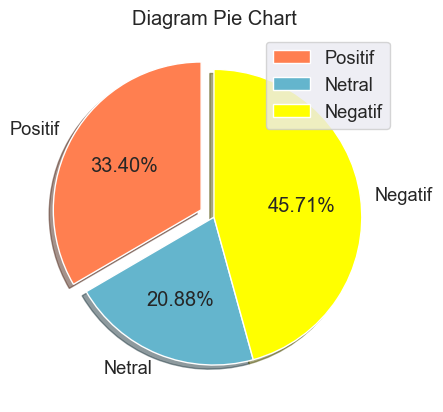

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
#pie chart
labels = ['Positif','Netral','Negatif']
Category2 = [4946,3092,6769]
color = ['coral', 'c','yellow']
plt.pie(Category2, labels=labels, colors=color,startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0, 0))
plt.title('Diagram Pie Chart')
plt.legend()
plt.show()

In [11]:
# keep_col = ['Text','Label']
# new_df = df[keep_col]
# new_df.to_csv("/Users/arman/Skripsi/Dataset/BigData/Fix/Piala-Dunia-Label.csv", index=False)